In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
data_entry = pd.read_csv('data/Data_Entry_2017_v2020.csv', delimiter=',')
data_entry

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [17]:
data_entry.head(20)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
6,00000003_003.png,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143,0.143
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,0.143
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,0.143
10,00000003_007.png,Hernia,6,3,80,F,PA,2582,2905,0.143,0.143


In [13]:
data_entry = data_entry[data_entry['Finding Labels']!='No Finding']

In [14]:
data_entry.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,51759.000000,51759.000000,51759.000000,51759.000000,51759.000000,51759.000000,51759.000000
mean,11.596804,14817.575475,47.962287,2670.105643,2481.301435,0.155023,0.155023
std,17.902624,8319.421492,16.588641,333.671746,398.998559,0.016060,0.016060
min,0.000000,1.000000,0.000000,1215.000000,966.000000,0.115000,0.115000
25%,1.000000,8051.000000,36.000000,2500.000000,2048.000000,0.143000,0.143000
50%,5.000000,14663.000000,50.000000,2544.000000,2544.000000,0.143000,0.143000
75%,14.000000,20949.000000,60.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30801.000000,94.000000,3827.000000,3567.000000,0.198800,0.198800


In [15]:
# drop unused columns
df = data_entry[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

# create new columns for each
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

/var/folders/1v/q1jh86h930b78s4n5wgsxcy80000gn/T/ipykernel_3245/1028418322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
/var/folders/1v/q1jh86h930b78s4n5wgsxcy80000gn/T/ipykernel_3245/1028418322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
/var/folders/1v/q1jh86h930b78s4n5wgsxcy80000gn/T/ipykernel_3245/1028418322.py:8: SettingWithCopy

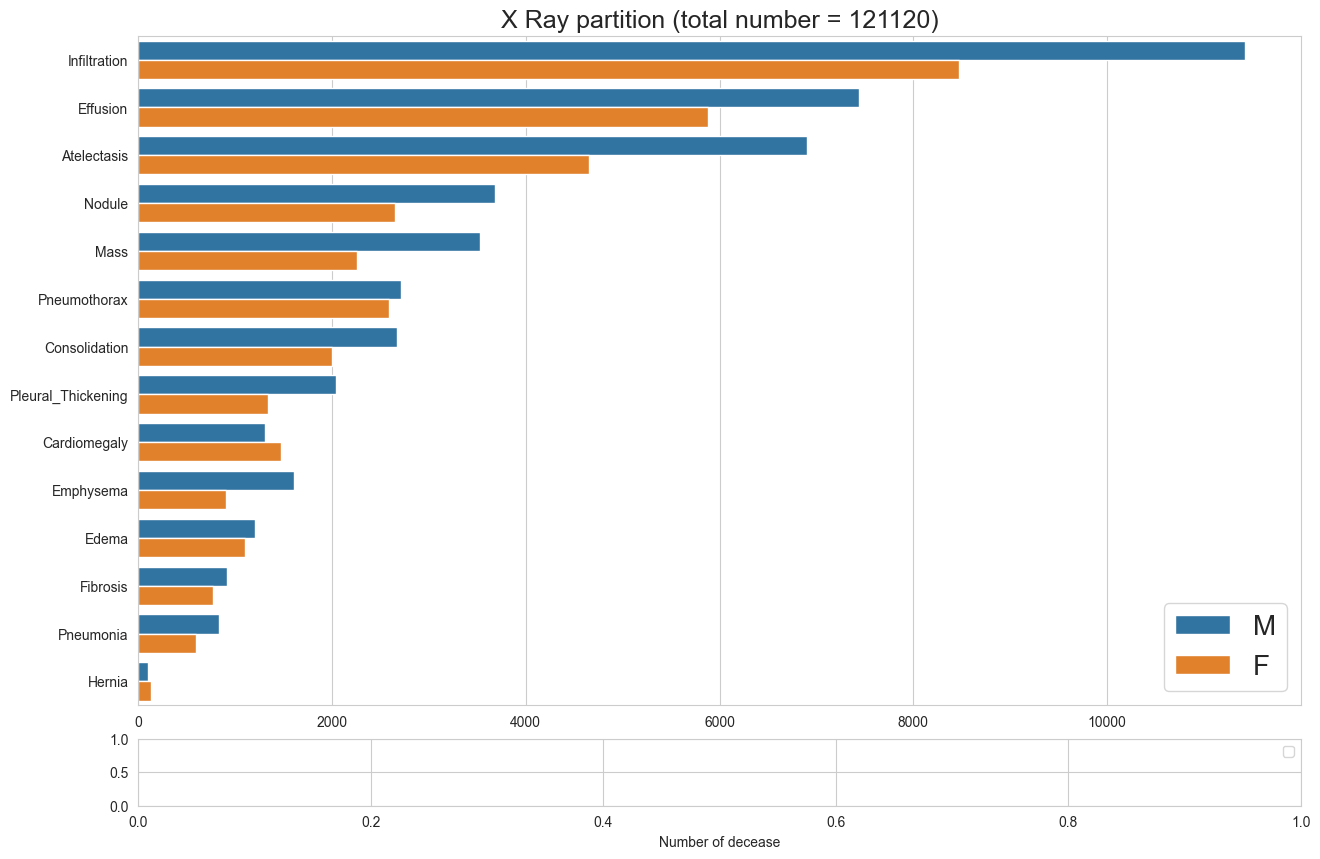

In [16]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of Diseases")
ax2.legend('')
plt.subplots_adjust(hspace=.5)